In [85]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.figsize'] = 15, 10

In [13]:
def make_step(current, tfr, b):
    return np.concatenate([[current[b] * tfr], current[:-1]])

In [92]:
def make_plot(current, tfr, b, fig=None):
    if fig is None:
        fig = plt
    current = np.array(current)
    counts = []
    for i in range(100):
        counts.append(current.sum())
        current = make_step(current, tfr, b)
    fig.plot(range(2000, 2100), counts)

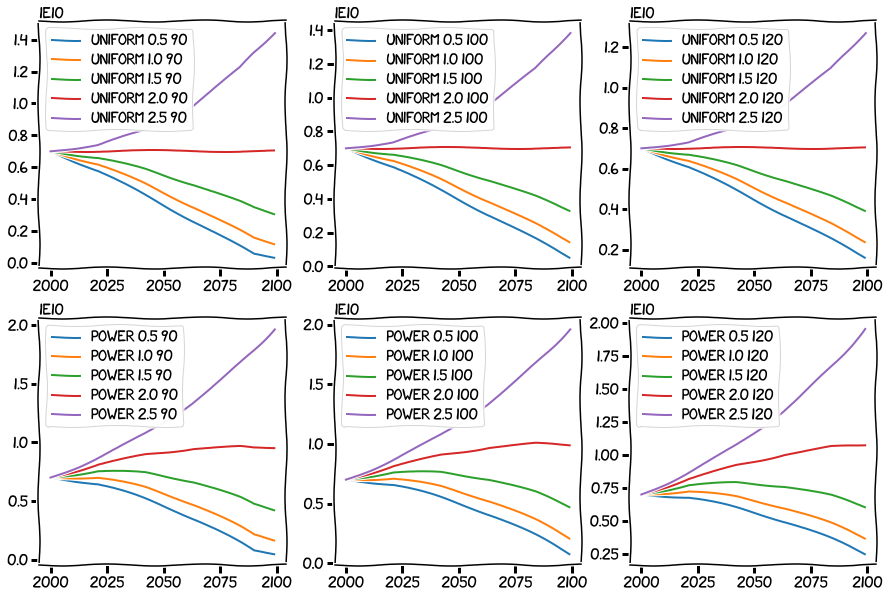

In [97]:
with plt.xkcd():
    ax, figs = plt.subplots(2, 3)
    for distr, fig_row in zip(['uniform', 'power'], figs):
        for le, fig in zip([90, 100, 120], fig_row):
            legends = []
            for ftr in [0.5, 1.0, 1.5, 2.0, 2.5]:
                if distr == 'uniform':
                    cur = np.ones(le)
                else:
                    cur = 1.01 ** -np.arange(le)
                cur /= cur.sum()
                cur *= 7 * 10**9
                make_plot(
                    cur,
                    ftr / 2,
                    20,
                    fig
                )
                legends.append('%s %.1f %d' % (distr, ftr, le, ))
            fig.legend(legends)
    plt.show()